In [1]:
#Basic libraries used
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Plotting tools
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
sns.set_theme()
#Scaling
from sklearn.preprocessing import StandardScaler #for PCA
from sklearn.preprocessing import MinMaxScaler #for MDS and Isomap

#Dimension Reduction
from sklearn.decomposition import PCA #for PCA
from sklearn.manifold import MDS #for MDS
from sklearn import manifold #for Isomap
from sklearn.manifold import TSNE #for tSNE
from sklearn.metrics import pairwise_distances as dis
from scipy.spatial import distance_matrix
from scipy import stats


In [2]:
#import csv into pandas dataframe
df=pd.read_csv('HW2.csv')


In [3]:
#normalise data
dfdata=df.loc[:,'V1':"V1499"]
norm=StandardScaler().fit_transform(dfdata)
dfnorm=pd.DataFrame(norm)
dfnorm.to_csv('HW2NORM.csv')

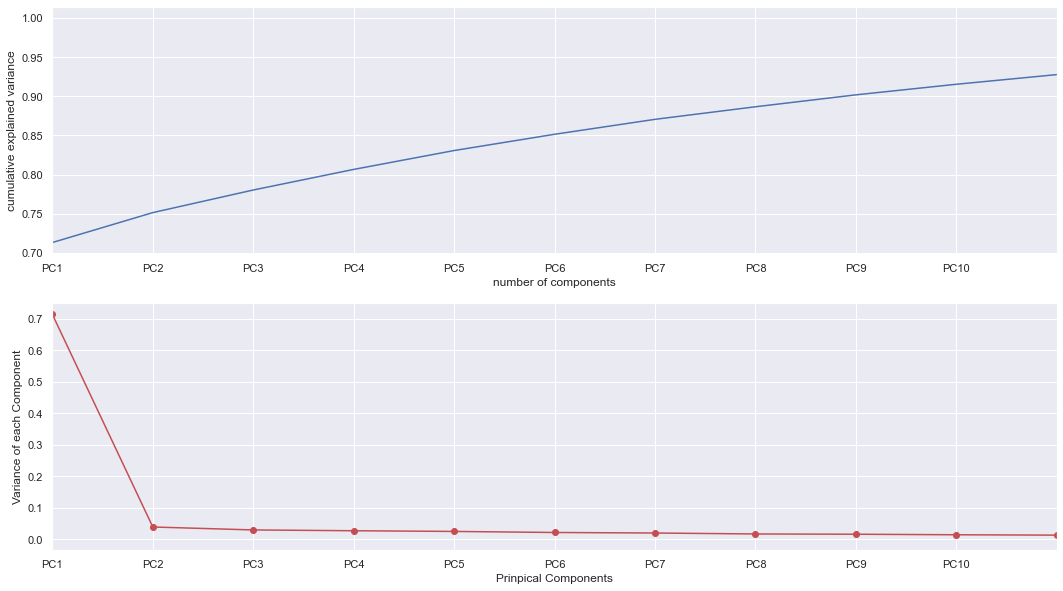

In [4]:
#Perform PCA
#check Variance
pca=PCA().fit(norm)
cumvar=np.cumsum(pca.explained_variance_ratio_)
fig, axs = plt.subplots(2, figsize=(18, 10))
plt.xlim(0,10)
axs[0].plot(cumvar)
axs[0].set_xlabel('number of components')
axs[0].set_ylabel('cumulative explained variance')
axs[0].set_xlim(0,10)
axs[0].set_xticks(np.arange(0,10,step=1))
axs[0].set_xticklabels(['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7',"PC8",'PC9','PC10'])
axs[1].plot(pca.explained_variance_ratio_,'ro-')
axs[1].set_xlabel('Prinpical Components')
axs[1].set_ylabel('Variance of each Component')
axs[1].set_xticks(np.arange(0,10,step=1))
axs[1].set_xticklabels(['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7',"PC8",'PC9','PC10'])
plt.savefig('pcavar.png',dpi=600)

In [7]:
print(pca.explained_variance_ratio_)

[7.13179413e-01 3.81895149e-02 2.88497507e-02 2.63038917e-02
 2.40988603e-02 2.07584166e-02 1.90789625e-02 1.60442914e-02
 1.52277492e-02 1.35093476e-02 1.23272060e-02 1.00031784e-02
 7.78050023e-03 6.64147567e-03 5.35418257e-03 4.84461105e-03
 4.30188433e-03 4.17822744e-03 3.15778956e-03 3.10341952e-03
 2.66469625e-03 2.24062369e-03 2.04055763e-03 1.80284611e-03
 1.64361962e-03 1.46125793e-03 1.29224862e-03 1.19536548e-03
 1.00666553e-03 9.28958276e-04 8.91098006e-04 7.90673271e-04
 6.76630949e-04 5.46167480e-04 4.86363993e-04 4.54451631e-04
 3.18981419e-04 2.83725558e-04 2.41423676e-04 2.19027429e-04
 1.93081040e-04 1.46790684e-04 1.34564409e-04 1.23622917e-04
 1.09267106e-04 1.01351277e-04 9.54866073e-05 9.33943062e-05
 8.40418801e-05 7.20125694e-05 7.16511347e-05 6.54703176e-05
 6.12016941e-05 5.43363118e-05 5.23606343e-05 4.36762660e-05
 3.77953338e-05 3.42609330e-05 3.19516484e-05 2.92929680e-05
 2.68975577e-05 2.59513136e-05 2.21117283e-05 1.89183985e-05
 1.68732174e-05 1.547344

In [8]:
#plot PCA
#Take out the PCA components into a Dataframe
dfpca=pd.DataFrame(pca.components_)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfpca['Class_Label']=label
dfpca['Class_Label']=dfpca['Class_Label'].apply(str)
#Plot PCA 1 and PCA 2

fig=px.scatter(dfpca,x=1,y=0,color='Class_Label',labels={'1':"PC 2 {3.8%}" ,'0':"PC 1 {71.3%}"})
fig.show()
fig.write_image("images/PCA12.svg")


In [9]:
#plot PCA
#Take out the PCA components into a Dataframe
dfpca=pd.DataFrame(pca.components_)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfpca['Class_Label']=label
dfpca['Class_Label']=dfpca['Class_Label'].apply(str)
#Plot PCA 1 and PCA 2

fig=px.scatter(dfpca,x=2,y=0,color='Class_Label',labels={'2':"PC 3 {2.9%}" ,'0':"PC 1 {71%}"})
fig.show()
fig.write_image("images/PCA13.svg")

In [10]:
#plot PCA
#Take out the PCA components into a Dataframe
dfpca=pd.DataFrame(pca.components_)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfpca['Class_Label']=label
dfpca['Class_Label']=dfpca['Class_Label'].apply(str)
#Plot PCA 1 and PCA 2

fig=px.scatter(dfpca,x=1,y=2,color='Class_Label',labels={'1':"PC 2 {3.8%}" ,'2':"PC 3 {2.9%}"})
fig.show()
fig.write_image("images/PCA23.svg")

In [11]:
#Time to do metric MDS
#Perform a scaling 
dfscaled=MinMaxScaler().fit_transform(dfdata)


In [12]:
#Apply metric MDS
mds=MDS(2,random_state=0)
data_2d=mds.fit_transform(dfscaled)

In [16]:
#Place the MDS columns into a Dataframe
dfdatamds=pd.DataFrame(data_2d)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfdatamds['Class_Label']=label
dfdatamds['Class_Label']=dfdatamds['Class_Label'].apply(str)

#Plot MDS

fig=px.scatter(dfpca,x=1,y=0,color='Class_Label',labels={'1':"Coordinate 2" ,'0':"Coordinate 1"})
fig.show()
fig.write_image("images/MDS.svg")

In [43]:
#Isomap Section
x=pca.components_[:,0]
y=pca.components_[:,1]
x=x.reshape((-1,1))
y=y.reshape((-1,1))
euclid=distance_matrix(x,y)
#digit=[1,2,3,4,5,6,7,8,9,10]
#for k in digit:
iso=manifold.Isomap(n_neighbors=2,n_components=2,path_method='FW',p=2)
iso.fit(dfscaled) 
iso_2d=iso.transform(dfscaled)
R=1-stats.pearsonr(euclid,dist_matrix_)
print(R)

NameError: name 'dist_matrix_' is not defined

In [45]:

#WM method and K=2
iso=manifold.Isomap(n_neighbors=2,n_components=2,path_method='FW')
iso.fit(dfscaled) #dfscaled is scaled data for MDS but before applying MDS
iso_2d=iso.transform(dfscaled)
dfdataiso=pd.DataFrame(iso_2d)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfdataiso['Class_Label']=label
dfdataiso['Class_Label']=dfdataiso['Class_Label'].apply(str)
fig=px.scatter(dfdataiso,x=0,y=1,color='Class_Label',labels={'0':"Coordinate 1" ,'1':"Coordinate 2"},title='Isomap K=2;Floyd-Warshall')
fig.show()
fig.write_image("images/isoFW1.svg")
print(dist_matrix_)

NameError: name 'dist_matrix_' is not defined

In [22]:
iso=manifold.Isomap(n_neighbors=4,n_components=2,path_method='FW')
iso.fit(dfscaled) #dfscaled is scaled data for MDS but before applying MDS
iso_2d=iso.transform(dfscaled)
dfdataiso=pd.DataFrame(iso_2d)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfdataiso['Class_Label']=label
dfdataiso['Class_Label']=dfdataiso['Class_Label'].apply(str)
fig=px.scatter(dfdataiso,x=0,y=1,color='Class_Label',labels={'0':"Coordinate 1" ,'1':"Coordinate 2"},title='Isomap K=4;Floyd-Warshall')
fig.show()
fig.write_image("images/isoFW4.svg")

In [21]:
iso=manifold.Isomap(n_neighbors=6,n_components=2,path_method='FW')
iso.fit(dfscaled) #dfscaled is scaled data for MDS but before applying MDS
iso_2d=iso.transform(dfscaled)
dfdataiso=pd.DataFrame(iso_2d)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfdataiso['Class_Label']=label
dfdataiso['Class_Label']=dfdataiso['Class_Label'].apply(str)
fig=px.scatter(dfdataiso,x=0,y=1,color='Class_Label',labels={'0':"Coordinate 1" ,'1':"Coordinate 2"},title='Isomap K=6;Floyd-Warshall')
fig.show()
fig.write_image("images/isoFW6.svg")

In [20]:
iso=manifold.Isomap(n_neighbors=2,n_components=2,path_method='D')
iso.fit(dfscaled) #dfscaled is scaled data for MDS but before applying MDS
iso_2d=iso.transform(dfscaled)
dfdataiso=pd.DataFrame(iso_2d)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfdataiso['Class_Label']=label
dfdataiso['Class_Label']=dfdataiso['Class_Label'].apply(str)
fig=px.scatter(dfdataiso,x=0,y=1,color='Class_Label',labels={'0':"Coordinate 1" ,'1':"Coordinate 2"},title='Isomap K=2; Dijkstra')
fig.show()
fig.write_image("images/isoD2.svg")

In [19]:
iso=manifold.Isomap(n_neighbors=4,n_components=2,path_method='D')
iso.fit(dfscaled) #dfscaled is scaled data for MDS but before applying MDS
iso_2d=iso.transform(dfscaled)
dfdataiso=pd.DataFrame(iso_2d)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfdataiso['Class_Label']=label
dfdataiso['Class_Label']=dfdataiso['Class_Label'].apply(str)
fig=px.scatter(dfdataiso,x=0,y=1,color='Class_Label',labels={'0':"Coordinate 1" ,'1':"Coordinate 2"},title='Isomap K=4; Dijkstra')
fig.show()
fig.write_image("images/isoD4.svg")

In [17]:
iso=manifold.Isomap(n_neighbors=6,n_components=2,path_method='D')
iso.fit(dfscaled) #dfscaled is scaled data for MDS but before applying MDS
iso_2d=iso.transform(dfscaled)
dfdataiso=pd.DataFrame(iso_2d)
#Append the Class Label column from original data set to it
label=df['Class_Label']
dfdataiso['Class_Label']=label
dfdataiso['Class_Label']=dfdataiso['Class_Label'].apply(str)
fig=px.scatter(dfdataiso,x=0,y=1,color='Class_Label',labels={'0':"Coordinate 1" ,'1':"Coordinate 2"},title='Isomap K=6; Dijkstra')
fig.show()
fig.write_image("images/isoD6.svg")

In [61]:
#time for tSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000)
tsne_results = tsne.fit_transform(dfdata)
dftsne = pd.DataFrame(tsne_results)
label=df['Class_Label']
dftsne['Class_Label']=label
dftsne['Class_Label']=dftsne['Class_Label'].apply(str)


fig=px.scatter(dftsne,x=0,y=1,color='Class_Label',labels={'0':"tSNE 1" ,'1':"tSNE 2"},title='tSNE Perplexity=5')
fig.show()
fig.write_image("images/tSNE.svg")

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.001s...
[t-SNE] Computed neighbors for 88 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 2548.026786
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.788429
[t-SNE] KL divergence after 1000 iterations: 0.593241


In [64]:
tsne10 = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000)
tsne_results10 = tsne10.fit_transform(dfdata)
dftsne10 = pd.DataFrame(tsne_results10)
label=df['Class_Label']
dftsne10['Class_Label']=label
dftsne10['Class_Label']=dftsne10['Class_Label'].apply(str)


fig=px.scatter(dftsne10,x=0,y=1,color='Class_Label',labels={'0':"tSNE 1" ,'1':"tSNE 2"},title='tSNE perpexity=10')
fig.show()
fig.write_image("images/tSNE10.svg")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.000s...
[t-SNE] Computed neighbors for 88 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 5610.128163
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.368546
[t-SNE] KL divergence after 1000 iterations: 0.333442


In [65]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=1000)
tsne_results = tsne.fit_transform(dfdata)
dftsne = pd.DataFrame(tsne_results)
label=df['Class_Label']
dftsne['Class_Label']=label
dftsne['Class_Label']=dftsne['Class_Label'].apply(str)


fig=px.scatter(dftsne,x=0,y=1,color='Class_Label',labels={'0':"tSNE 1" ,'1':"tSNE 2"},title='tSNE perpexity=20')
fig.show()
fig.write_image("images/tSNE20.svg")

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.000s...
[t-SNE] Computed neighbors for 88 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 7264.972402
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.314083
[t-SNE] KL divergence after 1000 iterations: 0.471998


In [66]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(dfdata)
dftsne = pd.DataFrame(tsne_results)
label=df['Class_Label']
dftsne['Class_Label']=label
dftsne['Class_Label']=dftsne['Class_Label'].apply(str)


fig=px.scatter(dftsne,x=0,y=1,color='Class_Label',labels={'0':"tSNE 1" ,'1':"tSNE 2"},title='tSNE perpexity=30')
fig.show()
fig.write_image("images/tSNE30.svg")

[t-SNE] Computing 87 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.001s...
[t-SNE] Computed neighbors for 88 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 8017.467431
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.982246
[t-SNE] KL divergence after 300 iterations: 0.839119
